# Algoritmo de Prim
En base a los vertices
- 1. tomamos cualquier vertice y lo ponemos a una lista L
- 2. De todo los vertices vecinos a los nodos de la lista L, tomamos el que se encuentra a la menor distancia y lo agregamos a la lista L
- 3. Repetimos el paso 2

In [20]:
import heapq #monticulos usados para las colas de prioridad
lista=[(10,"A", "B"), (8,"A", "B"), (5,"A", "B")]
heapq.heapify(lista)
print(lista)

[(5, 'A', 'B'), (8, 'A', 'B'), (10, 'A', 'B')]


[('A', 'C', 3), ('C', 'F', 4), ('A', 'B', 5), ('B', 'D', 2), ('D', 'E', 1)]
15


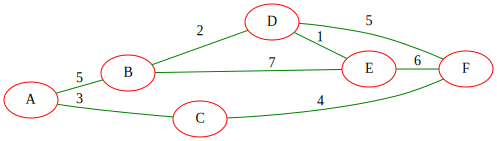

In [18]:
from graphviz import Graph
lag = {
    'A': {'B': 5, 'C': 3},
    'B': {'A': 5, 'D': 2, 'E': 7},
    'C': {'A': 3, 'F': 4},
    'D': {'B': 2, 'E': 1, 'F': 5},
    'E': {'B': 7, 'D': 1, 'F': 6},
    'F': {'C': 4, 'D': 5, 'E': 6}
}

class MSTPrim:
  def __init__(self,lag):
    self.grafo=lag
    self.mst=[]
    self.costoTotal=0

  def dibujaGrafo(self):
    dibujo=Graph()
    dibujo.graph_attr['rankdir']='LR'

    for nodo in lag.keys():
      dibujo.node(nodo, color="red")

    for nodo, vecinos in lag.items():
      for vecino, peso in vecinos.items():
        if nodo<vecino:
          dibujo.edge(nodo, vecino, label=str(peso), color="green")
    return dibujo

  #eL mst será una lista, donde cada elemento tendrá el siguienyte formato (nodo, vecino, distancia)
  # dibujara esto, mst= [('A', 'C', 3), ('C', 'F', 4), ('A', 'B', 5), ('B', 'D', 2), ('D', 'E', 1)]
  def dibujaMST(self):
    dibujo=Graph()
    dibujo.graph_attr['rankdir']='LR'
    for tripleta in self.mst:
      dibujo.edge(tripleta[0], tripleta[1], label=str(tripleta[2]))
    return dibujo

  def prim(self):
    nodoInicio=next(iter(self.grafo))
    visitados=set([nodoInicio])
    #poniendo en la lista los elemento en este formaro (costo, nodo, vecino)
    colaPrioridad=[(costo, nodoInicio, nodoVecino) for nodoVecino, costo in self.grafo[nodoInicio].items()]
    heapq.heapify(colaPrioridad) #
    while colaPrioridad:
      costo, nodo, vecino=heapq.heappop(colaPrioridad)
      if vecino not in visitados:
        visitados.add(vecino)
        self.mst.append((nodo, vecino, costo))
        self.costoTotal+=costo
        for vecinoVecino, costoVecino in self.grafo[vecino].items():
          if vecinoVecino not in visitados:
            heapq.heappush(colaPrioridad, (costoVecino, vecino, vecinoVecino))

  def getMST(self):
    return self.mst

  def getCostoTotal(self):
    return self.costoTotal

#pruenas
mst=MSTPrim(lag)
mst.prim()

print(mst.getMST())
print(mst.getCostoTotal())
mst.dibujaGrafo()




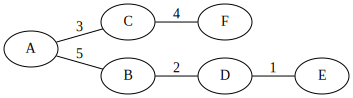

In [15]:
mst.dibujaMST()

# Algoritmo de Kruskal
1. Seleccionamos la menor arista y lko mandamos  a la lista L
2. De las aristas que quedan, seleccionamos, la menor, pero evitando esta forme un ciclo. Si forma un ciclo descartamos la arista y vamos por la sigueinte
3. Repetimos el paso 2


[('D', 'E', 1), ('B', 'D', 2), ('A', 'C', 3), ('C', 'F', 4), ('A', 'B', 5)]
15


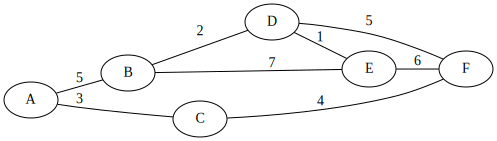

In [45]:
#
class ConjuntoDisjunto:
  def __init__(self, vertices):
    self.padre={v:v for v in vertices}
    self.altura={v:0 for v in vertices}

  #metodo para buscar la raiz de un nodo en un arbol
  def find(self, e):
    if self.padre[e]!=e:
      self.padre[e]=self.find(self.padre[e]) #recorrido
    return self.padre[e]

  #union de dos nodos en un arbol
  def union(self, nodo1, nodo2):
    rnodo1=self.find(nodo1)
    rnodo2=self.find(nodo2)
    if rnodo1==rnodo2:
      return # nodo1 y nodo2 están tienen la misma raiz, si los junto se formará un ciclo
    if rnodo1!=rnodo2:
      if self.altura[rnodo1]>self.altura[rnodo2]:
        self.padre[rnodo2]=rnodo1
      elif self.altura[rnodo1]<self.altura[rnodo2]:
        self.padre[rnodo1]=rnodo2
      else:
        self.padre[rnodo2]=rnodo1
        self.altura[rnodo1]+=1

class MSTKruskal:
  def __init__(self, lag):
    self.grafo=lag
    self.mst=[]
    self.costoTotal=0

  def dibujaGrafo(self):
      # Crear un nuevo grafo no dirigido
      dibujo = Graph()
      dibujo.graph_attr['rankdir']='LR'
      # Agregar nodos al grafo
      for nodo in lag.keys():
          dibujo.node(nodo)

      # Agregar aristas con pesos al grafo
      for nodo, conexiones in lag.items():
          for vecino, peso in conexiones.items():
              if nodo < vecino:  # Evitar duplicar aristas
                  dibujo.edge(nodo, vecino, label=str(peso))
      return dibujo

  #El mst
  #graficar [('D', 'E', 1), ('B', 'D', 2), ('A', 'C', 3), ('C', 'F', 4), ('A', 'B', 5)]
  def dibujaMST(self):
    # Crear un nuevo grafo no dirigido
    dibujo = Graph()
    dibujo.graph_attr['rankdir']='LR'

    # Agregar aristas con pesos al grafo
    for nodo, vecino, costo in self.mst:
        dibujo.edge(nodo, vecino, label=str(costo))
    return dibujo

  def Kruskal(self):
    aristas=[]
    #formar una lista de aristas
    for nodo in self.grafo:
      for vecino in self.grafo[nodo]:
        aristas.append((self.grafo[nodo][vecino], nodo, vecino))

    aristas=list(set(aristas))
    aristas.sort()
    ocd=ConjuntoDisjunto(self.grafo.keys())

    for costo, nodo, vecino in aristas:
      if ocd.find(nodo)!=ocd.find(vecino): #controla que no hagamos ciclo
        ocd.union(nodo, vecino)
        self.mst.append((nodo, vecino, costo))
        self.costoTotal+=costo

  def getMST(self):
    return self.mst

  def getCostoTotal(self):
    return self.costoTotal

#Pruebas
lag = {
    'A': {'B': 5, 'C': 3},
    'B': {'A': 5, 'D': 2, 'E': 7},
    'C': {'A': 3, 'F': 4},
    'D': {'B': 2, 'E': 1, 'F': 5},
    'E': {'B': 7, 'D': 1, 'F': 6},
    'F': {'C': 4, 'D': 5, 'E': 6}
}

ok=MSTKruskal(lag)
ok.Kruskal()
print(ok.getMST())
print(ok.getCostoTotal())
ok.dibujaGrafo()



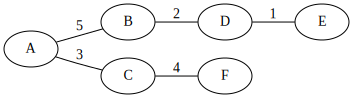

In [44]:
ok.dibujaMST()